<a href="https://colab.research.google.com/github/amohd63/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp6__Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example 1: Python code for a binary classifier perceptron with a step activation function and SGD training method. Note that, in SGD, the model parameters are updated after each selected sample.

In [1]:
import numpy as np

class Perceptron:
  def __init__(self, input_size, learning_rate, epochs):
    # Initialize weights and bias with random values
    self.weights = np.random.rand(input_size)
    self.bias = np.random.rand()

    # Set learning rate and number of epochs
    self.learning_rate = learning_rate
    self.epochs = epochs

  def step_activation(self, x):
    # Step activation function
    return 1 if x >= 0 else 0

  def predict(self, x):
    # Compute the weighted sum of inputs and bias
    net_input = np.dot(x, self.weights) + self.bias
    # Apply step activation function to the net input
    return self.step_activation(net_input)

  def trainSGD(self, X, y):
    # Training loop
    for epoch in range(self.epochs):
      # Initialize total error for the epoch
      total_error = 0

      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      # Iterate over each shuffled training example
      for i in range(len(X_shuffled)):
        # Make a prediction for the current input
        prediction = self.predict(X_shuffled[i])

        # Compute the error (desired - predicted)
        error = y_shuffled[i] - prediction

        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * error * X_shuffled[i]
        self.bias += self.learning_rate * error

        # Accumulate the absolute error for the epoch
        total_error += abs(error)

      # Print total errors for each epoch
      print(f"Epoch {epoch + 1}, Total Absolute Error: {total_error}")

# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for data in test_data:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Prediction: {prediction}")

Epoch 1, Total Absolute Error: 3
Epoch 2, Total Absolute Error: 3
Epoch 3, Total Absolute Error: 3
Epoch 4, Total Absolute Error: 3
Epoch 5, Total Absolute Error: 3
Epoch 6, Total Absolute Error: 3
Epoch 7, Total Absolute Error: 3
Epoch 8, Total Absolute Error: 3
Epoch 9, Total Absolute Error: 3
Epoch 10, Total Absolute Error: 3
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


Task 6.1: Run the code in Example 1 with more epochs [10, 20, 100, and 200] and compute the accuracy of the tested samples for each case. Did we need to run with more epochs? Justify your answer.

In [2]:
epochs_list = [10, 20, 100, 200]
accuracy_list = []

for epoch in epochs_list:
  print(f"Epoch: {epoch}, starting..")
  # Create a perceptron instance with 2 input neurons
  perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=epoch)

  # Train the perceptron on the dataset
  perceptron.trainSGD(X, y)

  # Test the trained perceptron on the testing samples
  test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
  accuracy = 0

  i = 0
  for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")
    if prediction == y[i]:
      accuracy = accuracy + 1
    i = i + 1
  accuracy_list.append(accuracy/len(y))
for acc, ep in zip(accuracy_list, epochs_list):
  print(f"At epoch: {ep}, Accuracy: {acc}\n")

Epoch: 10, starting..
Epoch 1, Total Absolute Error: 3
Epoch 2, Total Absolute Error: 3
Epoch 3, Total Absolute Error: 3
Epoch 4, Total Absolute Error: 3
Epoch 5, Total Absolute Error: 3
Epoch 6, Total Absolute Error: 3
Epoch 7, Total Absolute Error: 3
Epoch 8, Total Absolute Error: 3
Epoch 9, Total Absolute Error: 3
Epoch 10, Total Absolute Error: 3
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1
Epoch: 20, starting..
Epoch 1, Total Absolute Error: 3
Epoch 2, Total Absolute Error: 3
Epoch 3, Total Absolute Error: 3
Epoch 4, Total Absolute Error: 3
Epoch 5, Total Absolute Error: 3
Epoch 6, Total Absolute Error: 3
Epoch 7, Total Absolute Error: 3
Epoch 8, Total Absolute Error: 3
Epoch 9, Total Absolute Error: 3
Epoch 10, Total Absolute Error: 2
Epoch 11, Total Absolute Error: 2
Epoch 12, Total Absolute Error: 2
Epoch 13, Total Absolute Error: 1
Epoch 14, Total Absolute Error: 1
Epoch 15, Total Absolute Error: 1
Epoch 16, To

Task 6.2: Run the same code in Example 1 with a higher learning rate [0.05, 0.1, 0.3]. Draw on your observations.

In [3]:
learning_rates = [0.05, 0.1, 0.3, 0.95]

for lr in learning_rates:
  print(f"Learning rate: {lr}, starting..")
  # Create a perceptron instance with 2 input neurons
  perceptron = Perceptron(input_size=2, learning_rate=lr, epochs=10)

  # Train the perceptron on the dataset
  perceptron.trainSGD(X, y)

  # Test the trained perceptron on the testing samples
  test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
  accuracy = 0
  i = 0
  for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Prediction: {prediction}")
    if prediction == y[i]:
      accuracy = accuracy + 1
    i = i + 1
  print(f"Accuracy: {accuracy/len(y)}\n")

Learning rate: 0.05, starting..
Epoch 1, Total Absolute Error: 3
Epoch 2, Total Absolute Error: 3
Epoch 3, Total Absolute Error: 3
Epoch 4, Total Absolute Error: 3
Epoch 5, Total Absolute Error: 2
Epoch 6, Total Absolute Error: 2
Epoch 7, Total Absolute Error: 1
Epoch 8, Total Absolute Error: 1
Epoch 9, Total Absolute Error: 1
Epoch 10, Total Absolute Error: 0
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0

Learning rate: 0.1, starting..
Epoch 1, Total Absolute Error: 3
Epoch 2, Total Absolute Error: 3
Epoch 3, Total Absolute Error: 2
Epoch 4, Total Absolute Error: 2
Epoch 5, Total Absolute Error: 1
Epoch 6, Total Absolute Error: 0
Epoch 7, Total Absolute Error: 0
Epoch 8, Total Absolute Error: 0
Epoch 9, Total Absolute Error: 0
Epoch 10, Total Absolute Error: 0
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1
Accuracy: 1.0

Learning rate: 0.3, s

---

Example 2: Python code for a perceptron with a linear activation function, MSE loss, and SGD training method

In [23]:
import numpy as np
import pandas as pd

class Perceptron:
  def __init__(self, input_size, learning_rate, epochs):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()
    self.learning_rate = learning_rate
    self.epochs = epochs

  def linear(self, x):
    return x

  def linear_derivative(self, x):
    return 1

  def predict(self, x):
    net_input = np.dot(x, self.weights) + self.bias
    return self.linear(net_input)

  def trainSGD(self, X, y):
    epochs_val = []
    mean_mse_val = []
    for epoch in range(self.epochs):
      # Initialize Mean Squared Error for this epoch
      total_mse = 0.0

      # Shuffle the training examples for this epoch
      indices = np.arange(len(X))
      np.random.shuffle(indices)
      X_shuffled = X[indices]
      Y_shuffled = y[indices]

      # Iterate on each sample
      for i in range(len(X)):
        prediction = self.predict(X_shuffled[i])
        error = Y_shuffled[i] - prediction

        # Compute gradients using linear derivative
        delta = error * self.linear_derivative(prediction)

        # Update weights and bias using stochastic gradient descent
        self.weights += self.learning_rate * delta * X_shuffled[i]
        self.bias += self.learning_rate * delta

        # Accumulate the squared error for this example
        total_mse += error ** 2

      # Calculate the mean squared error for this epoch
      mean_mse = total_mse / len(X)
      print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")
      epochs_val.append(epoch)
      mean_mse_val.append(mean_mse)
    return epochs_val, mean_mse_val

# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2

# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'z': z})

# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error:54.4299
Epoch 2/10, Mean Squared Error:0.9345
Epoch 3/10, Mean Squared Error:0.8204
Epoch 4/10, Mean Squared Error:0.7764
Epoch 5/10, Mean Squared Error:0.7368
Epoch 6/10, Mean Squared Error:0.6914
Epoch 7/10, Mean Squared Error:0.6586
Epoch 8/10, Mean Squared Error:0.6233
Epoch 9/10, Mean Squared Error:0.5877
Epoch 10/10, Mean Squared Error:0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [2.49417375]
Input: 8.661761457749352, Actual: 27.985284373248057, Predicti

Task 6.3: Run the code in Example 2 and notice the difference between the actual output and the predicted output

Task 6.4: Run the code in Example 2 with more epochs [100]. Compare the results in terms of MSE and prediction error with the results in Task 6.3. Justify your answer

In [5]:
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Actual: {3*data+2}, Prediction: {prediction}")

Epoch 1/100, Mean Squared Error:68.8430
Epoch 2/100, Mean Squared Error:1.6111
Epoch 3/100, Mean Squared Error:1.4524
Epoch 4/100, Mean Squared Error:1.3650
Epoch 5/100, Mean Squared Error:1.2851
Epoch 6/100, Mean Squared Error:1.2309
Epoch 7/100, Mean Squared Error:1.1646
Epoch 8/100, Mean Squared Error:1.0980
Epoch 9/100, Mean Squared Error:1.0363
Epoch 10/100, Mean Squared Error:0.9834
Epoch 11/100, Mean Squared Error:0.9286
Epoch 12/100, Mean Squared Error:0.8736
Epoch 13/100, Mean Squared Error:0.8359
Epoch 14/100, Mean Squared Error:0.7879
Epoch 15/100, Mean Squared Error:0.7436
Epoch 16/100, Mean Squared Error:0.7028
Epoch 17/100, Mean Squared Error:0.6652
Epoch 18/100, Mean Squared Error:0.6293
Epoch 19/100, Mean Squared Error:0.5969
Epoch 20/100, Mean Squared Error:0.5637
Epoch 21/100, Mean Squared Error:0.5327
Epoch 22/100, Mean Squared Error:0.5043
Epoch 23/100, Mean Squared Error:0.4773
Epoch 24/100, Mean Squared Error:0.4500
Epoch 25/100, Mean Squared Error:0.4273
Epoch 26

Task 6.5: with epochs = 100, plot:
  * MSE with respect to the epoch number;
  * The actual function and the approximated function

In [10]:
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)

# Train the perceptron on the dataset
epochs, mse = perceptron.trainSGD(F, O)

Epoch 1/100, Mean Squared Error:69.5612
Epoch 2/100, Mean Squared Error:0.1142
Epoch 3/100, Mean Squared Error:0.0124
Epoch 4/100, Mean Squared Error:0.0116
Epoch 5/100, Mean Squared Error:0.0110
Epoch 6/100, Mean Squared Error:0.0104
Epoch 7/100, Mean Squared Error:0.0098
Epoch 8/100, Mean Squared Error:0.0093
Epoch 9/100, Mean Squared Error:0.0087
Epoch 10/100, Mean Squared Error:0.0083
Epoch 11/100, Mean Squared Error:0.0078
Epoch 12/100, Mean Squared Error:0.0074
Epoch 13/100, Mean Squared Error:0.0070
Epoch 14/100, Mean Squared Error:0.0067
Epoch 15/100, Mean Squared Error:0.0063
Epoch 16/100, Mean Squared Error:0.0059
Epoch 17/100, Mean Squared Error:0.0056
Epoch 18/100, Mean Squared Error:0.0053
Epoch 19/100, Mean Squared Error:0.0050
Epoch 20/100, Mean Squared Error:0.0047
Epoch 21/100, Mean Squared Error:0.0045
Epoch 22/100, Mean Squared Error:0.0042
Epoch 23/100, Mean Squared Error:0.0040
Epoch 24/100, Mean Squared Error:0.0038
Epoch 25/100, Mean Squared Error:0.0036
Epoch 26

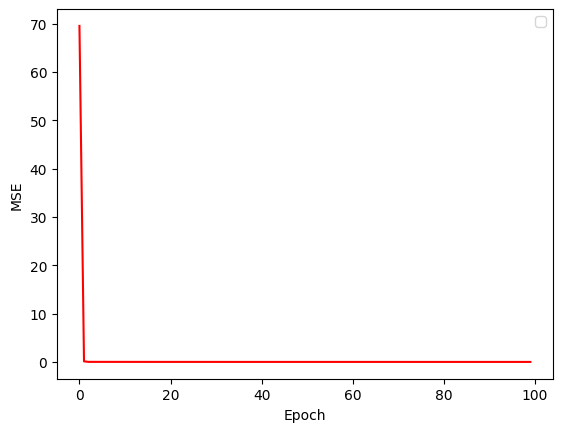

In [11]:
import matplotlib.pyplot as plt

plt.plot(epochs, mse, c='r')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

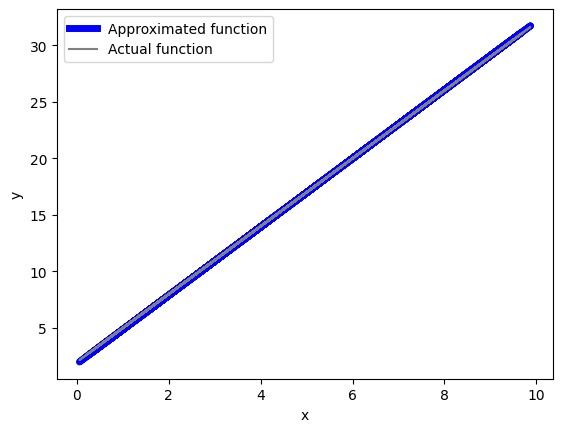

In [9]:
import matplotlib.pyplot as plt

predictions = []
actual = []
# Test the trained model
for data in x:
  prediction = perceptron.predict(data)
  predictions.append(prediction)
  actual.append(3*data+2)

plt.plot(x, predictions, c='b', linewidth=5, label="Approximated function")
plt.plot(x, actual, c='gray', label="Actual function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

Task 6.6: Modify the code in Example 2 to approximate f(x,y) = 2x + 3y

In [25]:
import pandas as pd
# Generate synthetic data
np.random.seed(42) # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
y = np.random.uniform(low=0, high=10, size=num_samples)
z = 2 * x + 3 * y

# Create a DataFrame to store the data
data = pd.DataFrame({'x': x, 'y': y, 'z': z})

# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values

# Create a perceptron instance with appropriate input size
input_size = 2
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)

# Train the perceptron on the dataset
perceptron.trainSGD(F, O)

# Test the trained model
for xx, yy in zip(x, y):
  t = [xx, yy]
  prediction = perceptron.predict([xx, yy])
  print(f"Input: {xx, yy}, Actual: {2*xx+3*yy}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error:75.4408
Epoch 2/10, Mean Squared Error:0.1795
Epoch 3/10, Mean Squared Error:0.0986
Epoch 4/10, Mean Squared Error:0.0824
Epoch 5/10, Mean Squared Error:0.0788
Epoch 6/10, Mean Squared Error:0.0753
Epoch 7/10, Mean Squared Error:0.0731
Epoch 8/10, Mean Squared Error:0.0710
Epoch 9/10, Mean Squared Error:0.0695
Epoch 10/10, Mean Squared Error:0.0658
Input: (3.745401188473625, 0.3142918568673425), Actual: 8.433677947549278, Prediction: 8.888827391535926
Input: (9.50714306409916, 6.364104112637804), Actual: 38.106598466111734, Prediction: 37.96777287736189
Input: (7.319939418114051, 3.143559810763267), Actual: 24.0705582685179, Prediction: 24.20542499789863
Input: (5.986584841970366, 5.085706911647028), Actual: 27.230290418881815, Prediction: 27.328214259799353
Input: (1.5601864044243652, 9.07566473926093), Actual: 30.34736702663152, Prediction: 30.450883618509785
Input: (1.5599452033620265, 2.4929222914887497), Actual: 10.598657281190302, Prediction: 11.045

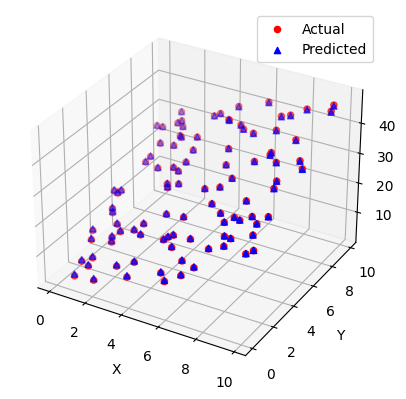

In [26]:
import matplotlib.pyplot as plt

predictions = []
actual = []

for xx, yy in zip(x, y):
  prediction = perceptron.predict([xx, yy])
  predictions.append(prediction)
  actual.append(2*xx+3*yy)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(x, y, actual, c='r', marker='o', label='Actual')

# Scatter plot for validation set
ax.scatter(x, y, predictions, c='b', marker='^', label='Predicted')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# Show plot
plt.show()

---

Task 6.7: Run the code in Example 1 to solve the logical XOR operation with 1000 epochs and compute the accuracy of the tested samples. [note: you need to change the training and testing data to reflect XOR logical operation.]

In [13]:
# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
accuracy = 0
i = 0
for data in test_data:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Prediction: {prediction}")
  if prediction == y[i]:
    accuracy = accuracy + 1
  i = i + 1
print(f"Accuracy: {accuracy/len(y)}\n")

Epoch 1/1000, Mean Squared Error:3.3267
Epoch 2/1000, Mean Squared Error:2.9719
Epoch 3/1000, Mean Squared Error:2.6605
Epoch 4/1000, Mean Squared Error:2.3857
Epoch 5/1000, Mean Squared Error:2.1444
Epoch 6/1000, Mean Squared Error:1.9320
Epoch 7/1000, Mean Squared Error:1.7454
Epoch 8/1000, Mean Squared Error:1.5813
Epoch 9/1000, Mean Squared Error:1.4367
Epoch 10/1000, Mean Squared Error:1.3086
Epoch 11/1000, Mean Squared Error:1.1957
Epoch 12/1000, Mean Squared Error:1.0958
Epoch 13/1000, Mean Squared Error:1.0085
Epoch 14/1000, Mean Squared Error:0.9321
Epoch 15/1000, Mean Squared Error:0.8637
Epoch 16/1000, Mean Squared Error:0.8031
Epoch 17/1000, Mean Squared Error:0.7497
Epoch 18/1000, Mean Squared Error:0.7025
Epoch 19/1000, Mean Squared Error:0.6614
Epoch 20/1000, Mean Squared Error:0.6249
Epoch 21/1000, Mean Squared Error:0.5928
Epoch 22/1000, Mean Squared Error:0.5645
Epoch 23/1000, Mean Squared Error:0.5396
Epoch 24/1000, Mean Squared Error:0.5169
Epoch 25/1000, Mean Squar

Task 6.8: Run the code in Example 1 to solve the logical XOR operation with 10000 epochs and compute the accuracy of the tested samples. Does the perceptron perform well on approximating XOR with more epochs? Justify your answer.


In [14]:
# Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.0001, epochs=10000)

# Train the perceptron on the dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
accuracy = 0
i = 0
for data in test_data:
  prediction = perceptron.predict(data)
  print(f"Input: {data}, Prediction: {prediction}")
  if prediction == y[i]:
    accuracy = accuracy + 1
  i = i + 1
print(f"Accuracy: {accuracy/len(y)}\n")

Streaming output truncated to the last 5000 lines.
Epoch 5007/10000, Mean Squared Error:0.4465
Epoch 5008/10000, Mean Squared Error:0.4465
Epoch 5009/10000, Mean Squared Error:0.4465
Epoch 5010/10000, Mean Squared Error:0.4464
Epoch 5011/10000, Mean Squared Error:0.4464
Epoch 5012/10000, Mean Squared Error:0.4463
Epoch 5013/10000, Mean Squared Error:0.4463
Epoch 5014/10000, Mean Squared Error:0.4463
Epoch 5015/10000, Mean Squared Error:0.4462
Epoch 5016/10000, Mean Squared Error:0.4462
Epoch 5017/10000, Mean Squared Error:0.4461
Epoch 5018/10000, Mean Squared Error:0.4461
Epoch 5019/10000, Mean Squared Error:0.4461
Epoch 5020/10000, Mean Squared Error:0.4460
Epoch 5021/10000, Mean Squared Error:0.4460
Epoch 5022/10000, Mean Squared Error:0.4460
Epoch 5023/10000, Mean Squared Error:0.4459
Epoch 5024/10000, Mean Squared Error:0.4459
Epoch 5025/10000, Mean Squared Error:0.4458
Epoch 5026/10000, Mean Squared Error:0.4458
Epoch 5027/10000, Mean Squared Error:0.4458
Epoch 5028/10000, Mean Sq

Look at the table

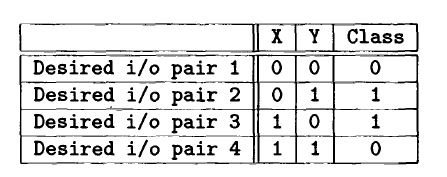

Form the equations:

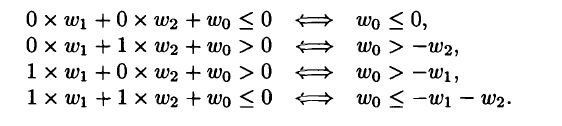

See the second and third equation and then have a look at equation 4. These equations are self-contradictory. Hence, cannot be solved with linear equations.

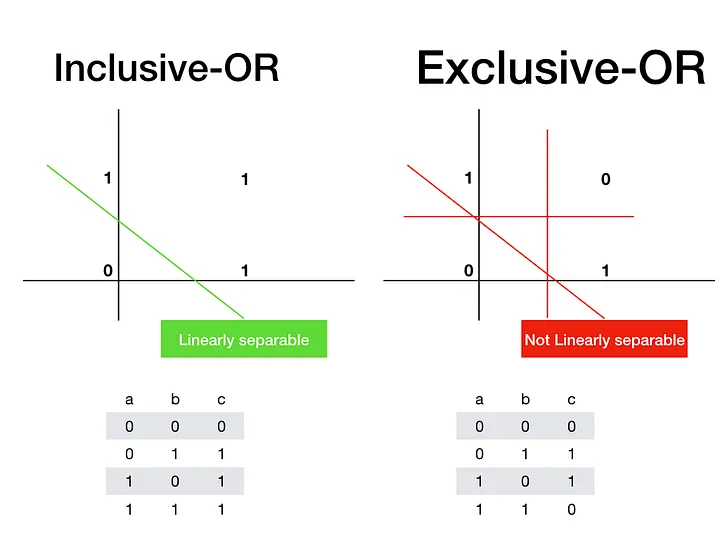

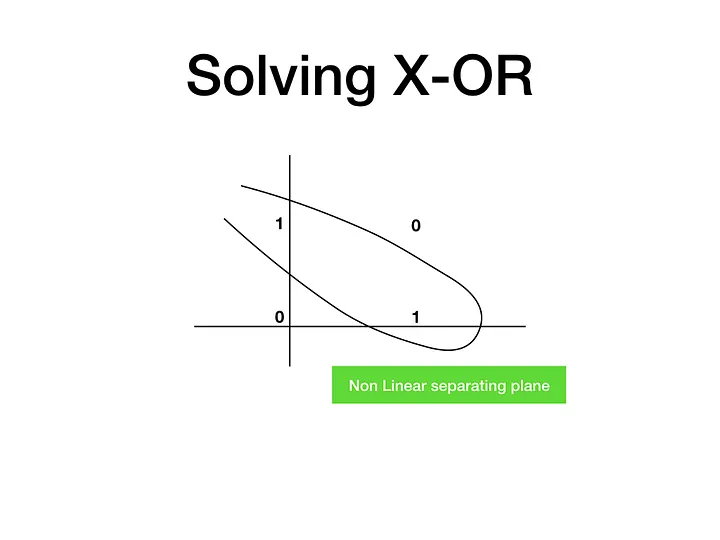

---

Example 3: Python code for building and training an MLP using MLPClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 0.3667


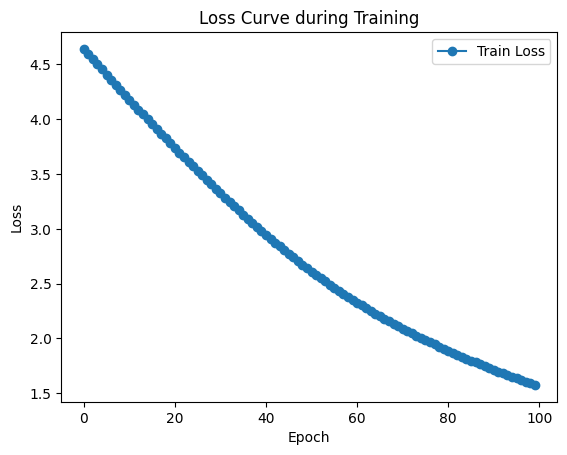

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Task 6.9: Run the code in Example 3 with the following customization of the MLPClassifier. For each case, save the results and compare the accuracy of the testing samples and the loss plot for each
case.
1. hidden_layer_sizes=(10, ), max_iter=1000
2. hidden_layer_sizes=(50, ), activation=relu, max_iter=1000, learning_rate=0.01
3. hidden_layer_sizes=(35, 15), activation=tanh, max_iter=1000, learning_rate=0.01


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Test Accuracy: 1.0000


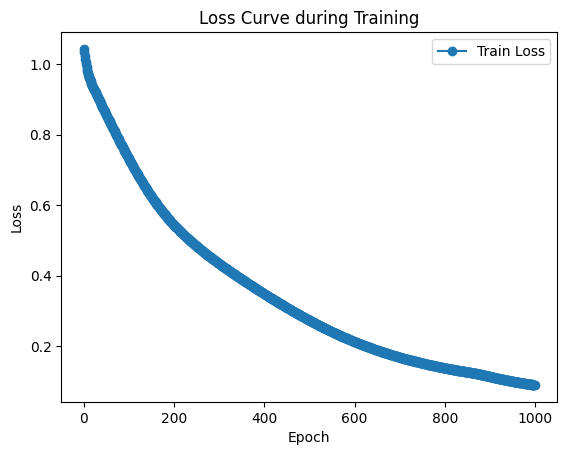

In [16]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy: 1.0000


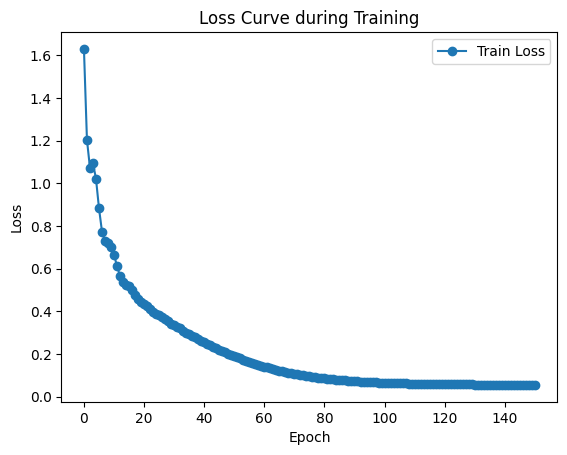

In [17]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', max_iter=1000, learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy: 1.0000


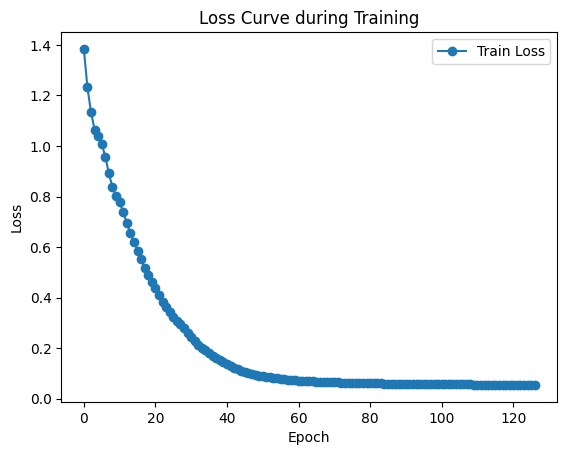

In [18]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(35, 15), activation='tanh', max_iter=1000, learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()